# Creating and Backtesting RSI Strategies

> __The Relative Strength Index (RSI) is a popular momentum oscillator used in technical analysis to assess the strength and speed of a price movement. The RSI is measured on a scale from 0 to 100 and is typically used to identify overbought or oversold conditions in a market. Traders often use the RSI as part of a broader trading strategy.__

__Understanding RSI:__

- The RSI is calculated using the following formula:

$RSI = 100 - \frac{100}{1+RS}$

- Where: 
    - RS (Relative Strength) is the __average gain over a specified period__ divided __by the average loss over the same period__.
        - (average gain / average loss)

__Interpretation:__
> The RSI is typically plotted on a chart with __values ranging from 0 to 100__. Traditionally, an RSI __reading above 70__ is considered __overbought__, suggesting that the asset may be due for a price correction. Conversely, an RSI __reading below 30__ is considered __oversold__, suggesting that the asset may be due for a price rebound.

---

# Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv("../Data/eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [3]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


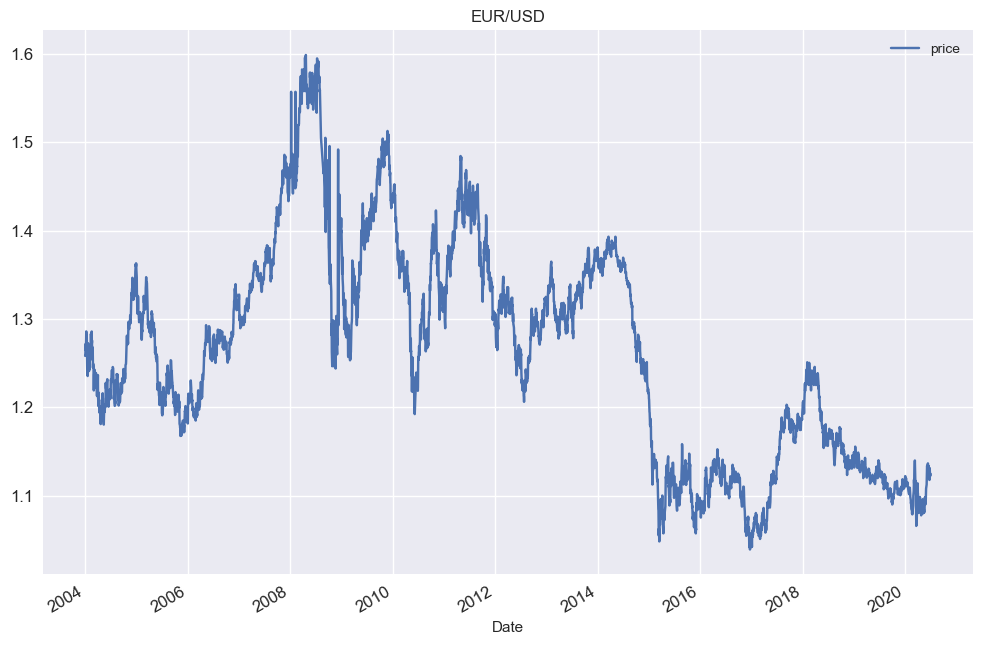

In [5]:
data.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

---

# Defining an RSI Strategy (Part 1)

In [6]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [7]:
data.price.diff()

Date
2004-01-01         NaN
2004-01-02    0.000000
2004-01-05    0.010504
2004-01-06    0.003405
2004-01-07   -0.008008
                ...   
2020-06-24    0.003267
2020-06-25   -0.006147
2020-06-26   -0.002879
2020-06-29    0.000378
2020-06-30    0.002134
Name: price, Length: 4275, dtype: float64

__U: (up)__ <br>
- if __positive__ price change ("up"): __price change__<br>
- if __negative__ price change ("down"): __0__

> Here we want to store all the dates that the price goes up (this is the gains, profit)

In [8]:
data["U"] = np.where(data.price.diff() > 0, data.price.diff(), 0)

__D: (down)__ <br>
- if __positive__ price change ("up"): __0__<br>
- if __negative__ price change ("down"): __-price change__

> Here we want to store all the dates that the price goes down (this is the loss)

In [9]:
data["D"] = np.where(data.price.diff() < 0, -data.price.diff(), 0)

In [10]:
data

,price,U,D
Date,,,
2004-01-01,1.258194,0.000000,0.000000
2004-01-02,1.258194,0.000000,0.000000
2004-01-05,1.268698,0.010504,0.000000
2004-01-06,1.272103,0.003405,0.000000
2004-01-07,1.264095,0.000000,0.008008
...,...,...,...
2020-06-24,1.131235,0.003267,0.000000
2020-06-25,1.125087,0.000000,0.006147
2020-06-26,1.122208,0.000000,0.002879


__Calculate Moving Averages for U and D__ (alternative: exponential smoothing)

In [11]:
periods = 20

In [12]:
# Compute the gain (profit) avarage
data["MA_U"] = data.U.rolling(periods).mean()

In [13]:
# Compute the loss avarage
data["MA_D"] = data.D.rolling(periods).mean()

- __`MA_U`__: the gains (profits) rolling avarage with window of 20
- __`MA_D`__: the loss rolling avarage with window of 20

In [14]:
data

,price,U,D,MA_U,MA_D
Date,,,,,
2004-01-01,1.258194,0.000000,0.000000,NaN,NaN
2004-01-02,1.258194,0.000000,0.000000,NaN,NaN
2004-01-05,1.268698,0.010504,0.000000,NaN,NaN
2004-01-06,1.272103,0.003405,0.000000,NaN,NaN
2004-01-07,1.264095,0.000000,0.008008,NaN,NaN
...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981


__Calculate Relative Strength Index (RSI)__

> __Ratio of ups to downs__.

Now, after we have the moving avarage of profits and loss, we can compute their ratio! __This is the RSI!__

We multiply by 100 for convert to % (from 0% to 100%)

In [15]:
data["RSI"] = data.MA_U / (data.MA_U + data.MA_D) * 100

In [16]:
data.dropna(inplace = True)

In [17]:
data

,price,U,D,MA_U,MA_D,RSI
Date,,,,,,
2004-01-28,1.244199,0.000000,0.019496,0.004610,0.005310,46.472973
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086
...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190


__Plot & interpret the Price and RSI__

- __We have two `y` axis__:
    - __On the left `y` axis__: this is the price. 
    - __On the rigth `y` axis__: this is the RSI.

> Now, where the `RSI` cross up the the 70%, its mean that the price is __"overbought"__ - and its signal to __SELL__ the stock.

> Now, where the `RSI` cross down the the 30%, its mean that the price is __"Oversold"__ - and its signal to __BUY__ the stock.

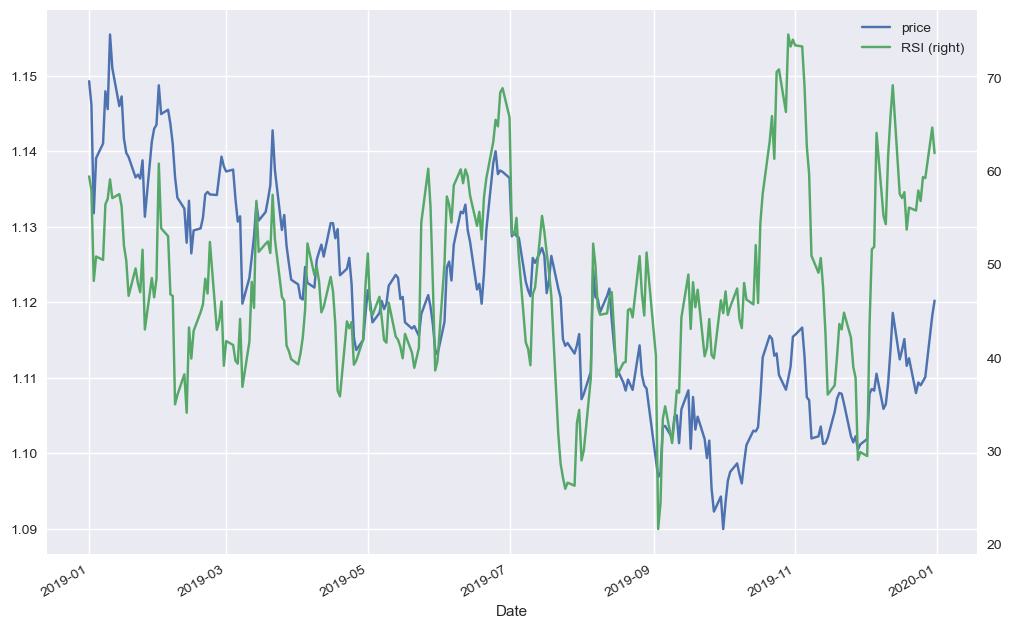

In [18]:
data.loc["2019", ["price", "RSI"]].plot(figsize = (12, 8), secondary_y = "RSI")
plt.show()

Instruments which have had
- __more or stronger positive changes__ have a __higher RSI__
- __more or stronger negative changes__ have a __lower RSI__

---

# Defining an RSI Strategy (Part 2)

- Extreme __high RSI__ (>70) indicates __overbought__ instrument -> __sell__
- Extreme __low RSI__ (<30) indicates __oversold__ instrument -> __buy__ 

In [19]:
# Set the bounds:
rsi_upper = 70
rsi_lower = 30

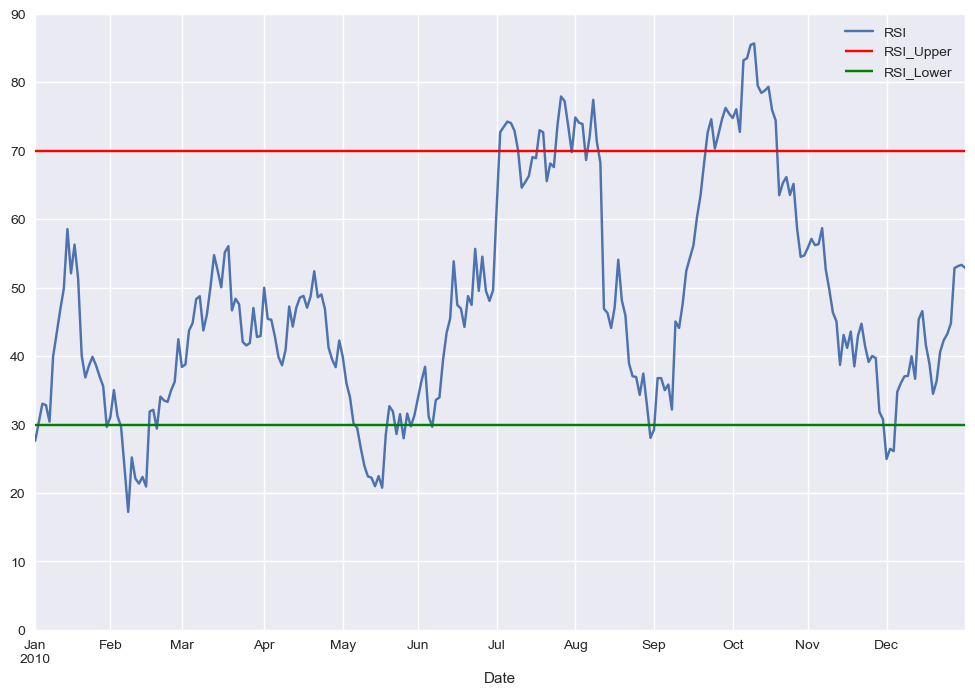

In [20]:
# Plot the RSI data
data.loc["2010", ["RSI"]].plot(figsize = (12, 8))

# horizonal line - upper bound
plt.hlines(y = rsi_upper, xmin = data.index[0], xmax = data.index[-1], label = "RSI_Upper", color = "r")
# horizonal line - lower bound
plt.hlines(y = rsi_lower, xmin = data.index[0], xmax = data.index[-1], label = "RSI_Lower", color = "g")

plt.yticks(ticks = range(0, 100, 10))
plt.legend()
plt.show()

__Defined the position strategy based__


In [21]:
# 1. overbought -> go short
# the RSI cross up the upper bound (70%) ? 
# its overbought, signal to SELL (-1). 
data["position"] = np.where(data.RSI > rsi_upper, -1, np.nan) 

In [22]:
# 2. oversold -> go long
# the RSI cross down the lower bound (30%) ? 
# its oversold, signal to BUY (1). 
data["position"] = np.where(data.RSI < rsi_lower, 1, data.position) 

In [23]:
# 3. where 1 & 2 isn´t applicable -> neutral
data.position = data.position.fillna(0) 

In [24]:
data

,price,U,D,MA_U,MA_D,RSI,position
Date,,,,,,,
2004-01-28,1.244199,0.000000,0.019496,0.004610,0.005310,46.472973,0.0
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0


In [25]:
# Let's count the number of positions we have taken
data.position.value_counts()

# Interpretation
# position
#  0.0    3637 -> nutral
# -1.0     316 -> short position!
#  1.0     303 -> long position! 

position
 0.0    3637
-1.0     316
 1.0     303
Name: count, dtype: int64

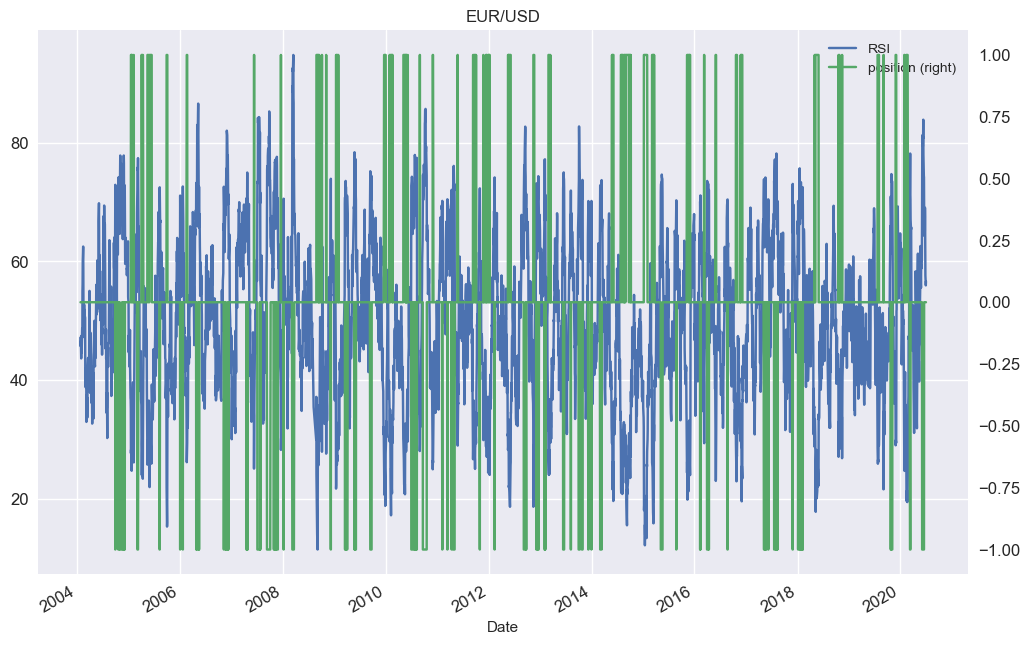

In [26]:
# Plot the RSI and the strategy based positions: 
data.loc[:, ["RSI", "position"]].plot(figsize = (12, 8), fontsize = 12, 
                                                      secondary_y = "position", title = "EUR/USD")
plt.show()

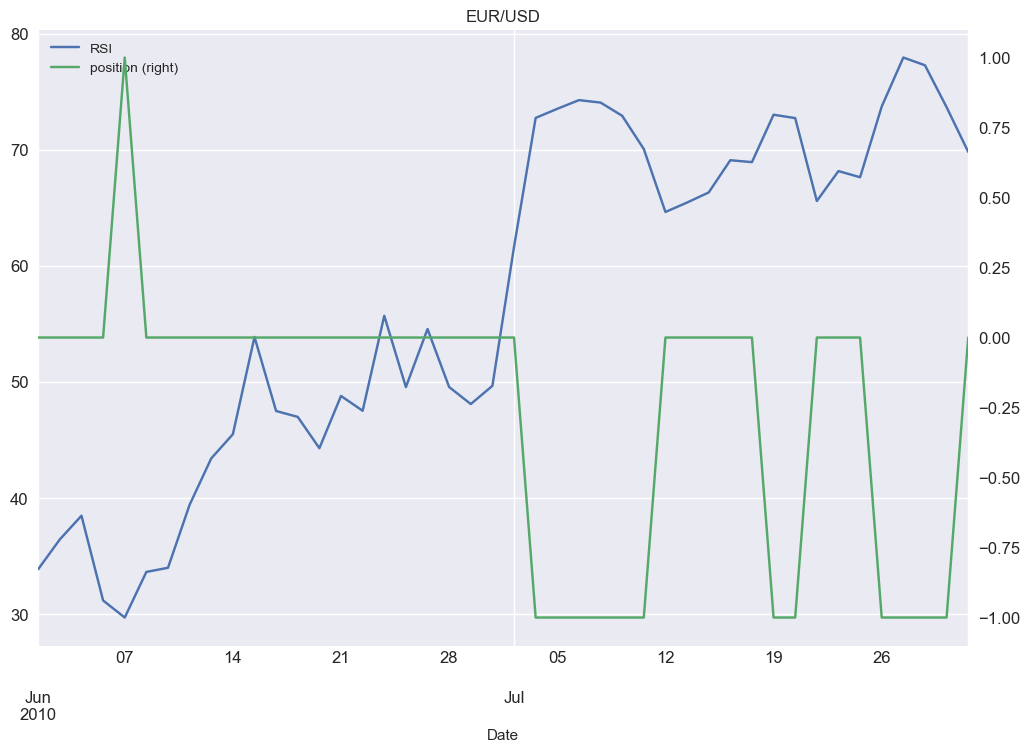

In [27]:
# Let's zoom in: 
# 0  = nutral
# 1  = BUY
# -1 = SELL 
data.loc["06-2010":"07-2010", ["RSI", "position"]].plot(figsize = (12, 8), fontsize = 12, 
                                                      secondary_y = "position", title = "EUR/USD")
plt.show()

---

# Vectorized Strategy Backtesting

> __Vectorized Strategy Backtesting work the same on any strategy__

In [28]:
data

,price,U,D,MA_U,MA_D,RSI,position
Date,,,,,,,
2004-01-28,1.244199,0.000000,0.019496,0.004610,0.005310,46.472973,0.0
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0


In [29]:
# Compute the log returns 
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [30]:
data.dropna(inplace = True)

In [31]:
data

,price,U,D,MA_U,MA_D,RSI,position,returns
Date,,,,,,,,
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0,-0.002572
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562


In [32]:
# Compute the return of the strategy
data["strategy"] = data.position.shift(1) * data["returns"]

In [33]:
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy
Date,,,,,,,,,
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0,-0.002572,NaN
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0
...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0


In [34]:
data.dropna(inplace = True)

In [35]:
# Proportional trading costs
ptc = 0.00007

In [36]:
# determine whether we make trade
# trade = change position!
data["trades"] = data.position.diff().fillna(0).abs()

In [37]:
data.trades.value_counts()
# 1.0     328 => we make 328 trades 


trades
0.0    3926
1.0     328
Name: count, dtype: int64

In [38]:
# Reduce the trading costs
data["strategy_net"] = data.strategy - data.trades * ptc

__calculate the cumulative return over time based on the log returns of a financial time series.__

- __data["returns"]:__ This likely represents the log returns of a financial asset. Log returns are calculated by taking the natural logarithm of the ratio of the current price to the previous price. They are often used in finance because they have some statistical properties that make them convenient for analysis.

- __`.cumsum():`__ This function calculates the cumulative sum of the log returns over time. It means each value in the resulting series is the sum of all previous log return values up to that point.

- __`.apply(np.exp):`__ After calculating the cumulative sum of log returns, the code applies the exponential function (np.exp) to each value. This is done to transform the cumulative log returns back into cumulative returns. The exponential of a log return is the original return.


In [39]:
# of buy and hold strategy
data["creturns"] = data["returns"].cumsum().apply(np.exp)
# of RSI strategy exlude trading costs
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
# of RSI strategy include trading costs
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [40]:
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
Date,,,,,,,,,,,,,,
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0,0.0,0.0,1.004676,1.000000,1.000000
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0,0.0,-0.0,1.001852,1.000000,1.000000
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0,0.0,0.0,1.010066,1.000000,1.000000
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0,0.0,0.0,1.010471,1.000000,1.000000
2004-02-05,1.257197,0.003200,0.000000,0.004229,0.005244,44.642922,0.0,0.002549,0.0,0.0,0.0,1.013050,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0,0.0,0.0,0.911549,1.562978,1.527501
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0,0.0,-0.0,0.906595,1.562978,1.527501
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0,0.0,-0.0,0.904276,1.562978,1.527501


__Plot the cumelative return os the strategis__

__Let's interpret the cstrategy_net cumelative return:__
- Starting Point (Initial Value): __1__
- Ending Point (Final Value): __1.5__

The ratio of the final value to the initial value is:
$\frac{1.5}{1} = 1.5$

- herefore, the cumulative return is 1.5, indicating a 50% increase from the starting point.

- In finance, cumulative return is often expressed as a percentage. To convert it to a percentage, you can subtract 1 (to remove the initial value) and then multiply by 100. In this case: $(1.5 - 1) X 100 = 0.5 X 100 = 50%$

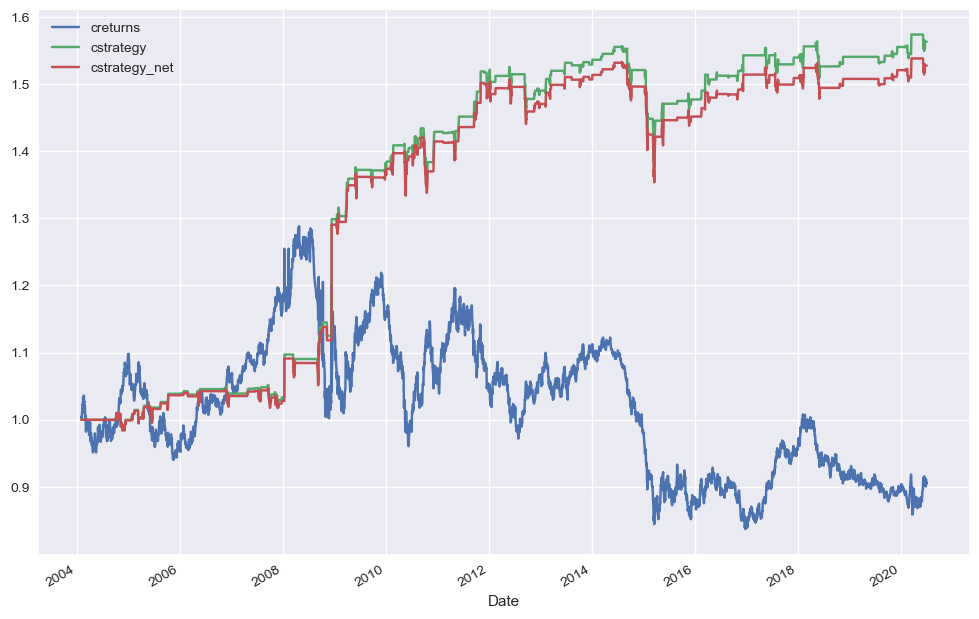

In [41]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

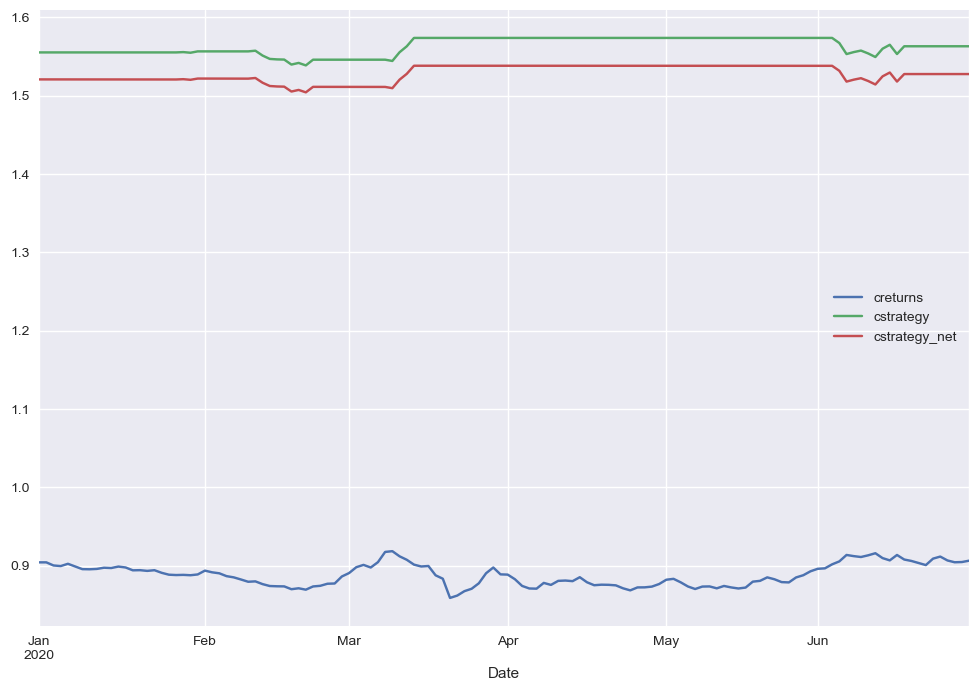

In [42]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

---

# Using the RSIBacktester Class

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

In [44]:
pd.read_csv("../Data/forex_pairs.csv")

,Date,AUDEUR=X,EURUSD=X,USDGBP=X
0,2004-01-01,0.59780,1.258194,0.56016
1,2004-01-02,0.60314,1.258194,0.55751
2,2004-01-05,0.60467,1.268698,0.55334
3,2004-01-06,0.60350,1.272103,0.54906
4,2004-01-07,0.60728,1.264095,0.55012
...,...,...,...,...
4290,2020-06-24,0.61349,1.131235,0.79841
4291,2020-06-25,0.60938,1.125087,0.80561
4292,2020-06-26,0.61373,1.122208,0.80480
4293,2020-06-29,0.61128,1.122586,0.81023


In [45]:
from RSIBacktester import RSIBacktester as RSI

In [46]:
ptc = 0.00007

In [47]:
tester = RSI("EURUSD=X", periods = 20, rsi_upper = 70, rsi_lower = 30,
              start = "2004-01-01", end = "2020-06-30", tc = ptc)

In [48]:
tester

RSIBacktester(symbol = EURUSD=X, RSI(20, 70, 30), start = 2004-01-01, end = 2020-06-30)

In [49]:
tester.data

,price,returns,U,D,MA_U,MA_D,RSI
Date,,,,,,,
2004-01-01,1.258194,NaN,0.000000,0.000000,NaN,NaN,NaN
2004-01-02,1.258194,0.000000,0.000000,0.000000,NaN,NaN,NaN
2004-01-05,1.268698,0.008313,0.010504,0.000000,NaN,NaN,NaN
2004-01-06,1.272103,0.002681,0.003405,0.000000,NaN,NaN,NaN
2004-01-07,1.264095,-0.006315,0.000000,0.008008,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,0.003267,0.000000,0.003182,0.001530,67.538713
2020-06-25,1.125087,-0.005449,0.000000,0.006147,0.003007,0.001837,62.077668
2020-06-26,1.122208,-0.002562,0.000000,0.002879,0.002696,0.001981,57.643190


In [50]:
tester.test_strategy()

(1.527501, 0.62353)

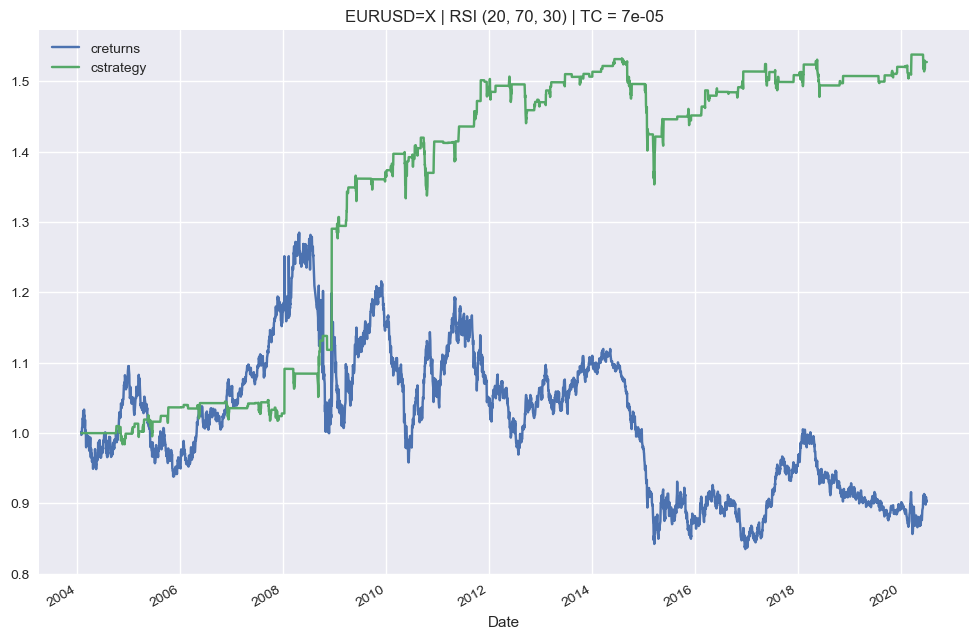

In [51]:
tester.plot_results()

In [52]:
tester.results

,price,returns,U,D,MA_U,MA_D,RSI,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,,
2004-01-29,1.241003,-0.002572,0.000000,0.003196,0.004610,0.005470,45.736150,0.0,-0.0,0.0,0.997431,1.000000
2004-01-30,1.246805,0.004665,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.0,0.0,1.002095,1.000000
2004-02-02,1.243302,-0.002814,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.0,0.0,0.999279,1.000000
2004-02-03,1.253494,0.008164,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.0,0.0,1.007471,1.000000
2004-02-04,1.253997,0.000401,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.0,0.0,1.007875,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.0,0.0,0.909207,1.527501
2020-06-25,1.125087,-0.005449,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.0,0.0,0.904266,1.527501
2020-06-26,1.122208,-0.002562,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.0,0.0,0.901953,1.527501


In [53]:
tester.optimize_parameters((5, 20, 1), (65, 80, 1), (20, 35, 1)) # higher volatility

(array([ 6., 65., 20.]), 2.582989)

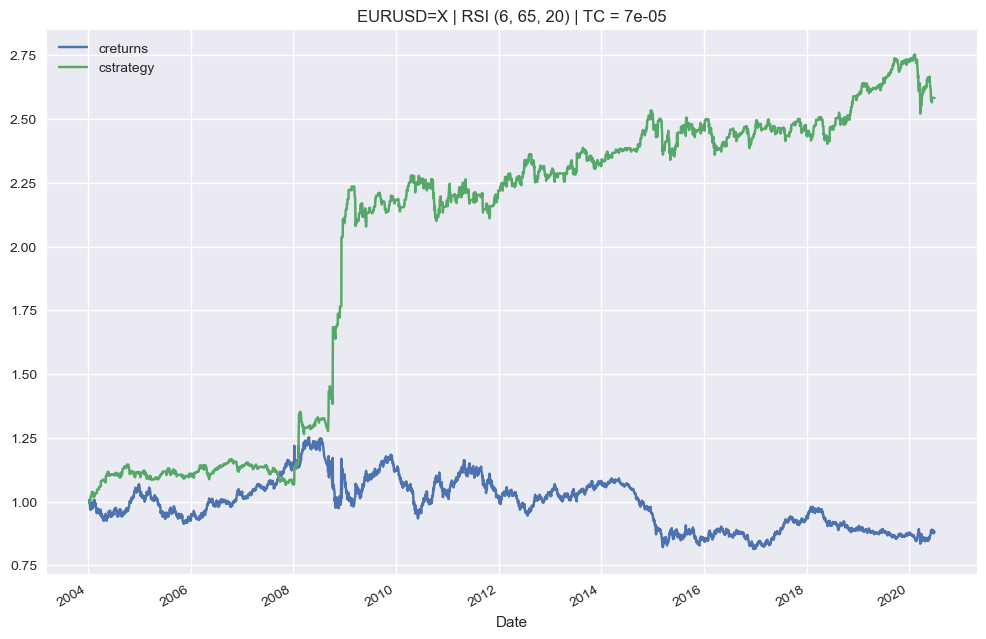

In [54]:
tester.plot_results()

In [55]:
tester.optimize_parameters((20, 50, 1), (75, 85, 1), (15, 25, 1)) # lower volatility

(array([26., 75., 24.]), 1.237744)

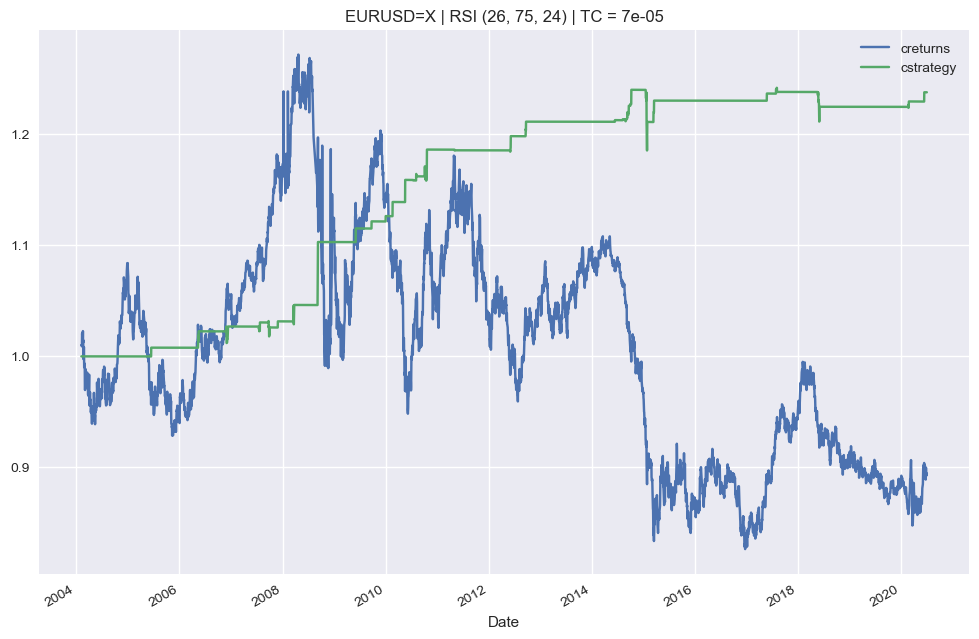

In [56]:
tester.plot_results()

__USD / GBP__

In [57]:
tester = RSI("USDGBP=X", periods = 20, rsi_upper = 70, rsi_lower = 30,
              start = "2004-01-01", end = "2020-06-30", tc = 0)

In [58]:
tester.test_strategy()

(1.060393, -0.414041)

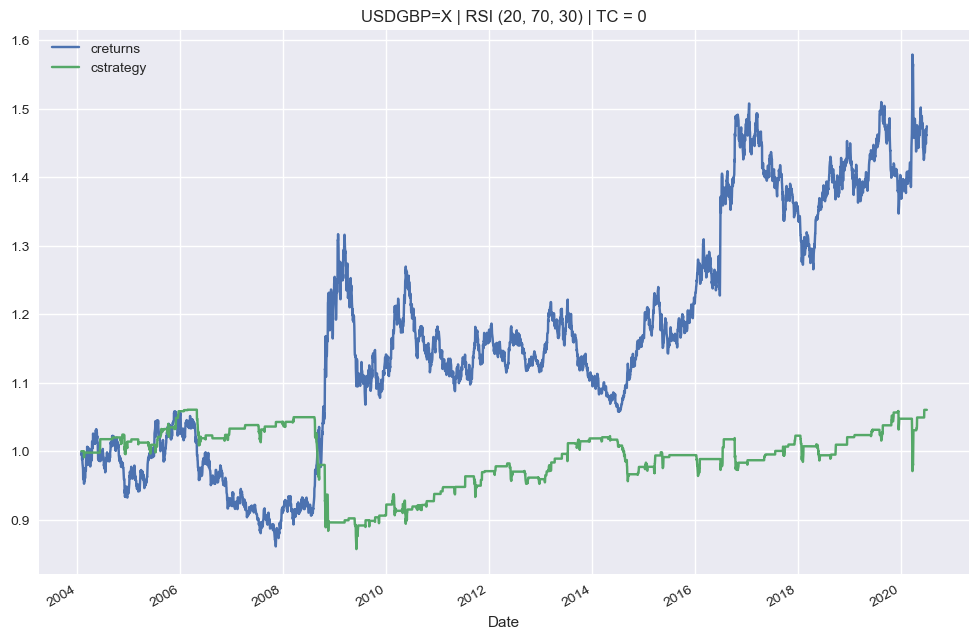

In [59]:
tester.plot_results()

In [60]:
tester.optimize_parameters((5, 20, 1), (65, 80, 1), (20, 35, 1)) # high volatility

(array([ 7., 66., 34.]), 1.515508)

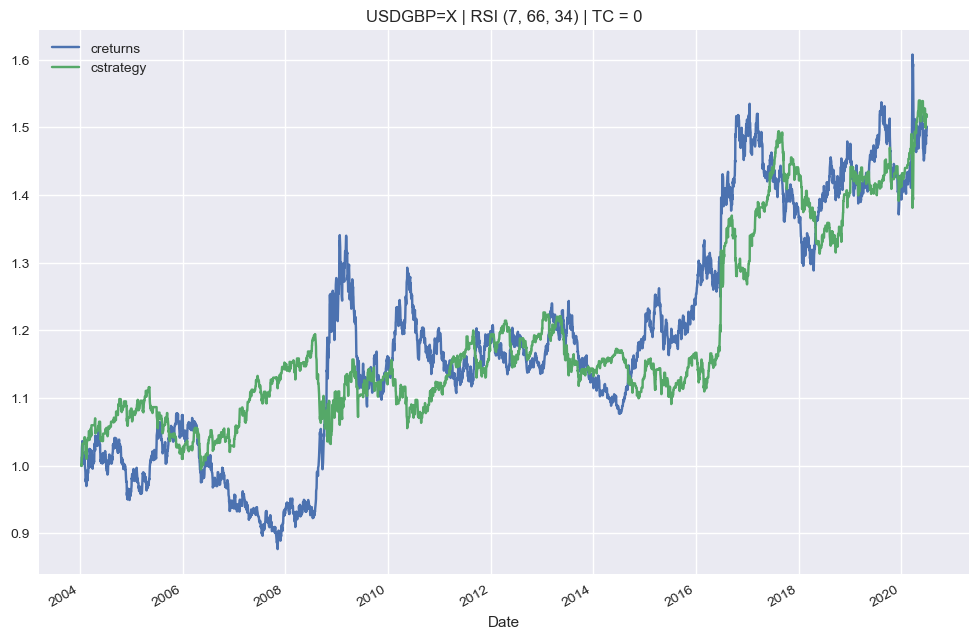

In [61]:
tester.plot_results()

---

# Alternative Strategies and Interpretations

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")
from RSIBacktester import RSIBacktester as RSI

In [63]:
tester = RSI("EURUSD=X", periods = 20, rsi_upper = 70, rsi_lower = 30,
              start = "2004-01-01", end = "2020-06-30", tc = 0)

In [64]:
alt = tester.data.dropna()
alt

,price,returns,U,D,MA_U,MA_D,RSI
Date,,,,,,,
2004-01-28,1.244199,-0.015548,0.000000,0.019496,0.004610,0.005310,46.472973
2004-01-29,1.241003,-0.002572,0.000000,0.003196,0.004610,0.005470,45.736150
2004-01-30,1.246805,0.004665,0.005802,0.000000,0.004900,0.005470,47.254310
2004-02-02,1.243302,-0.002814,0.000000,0.003503,0.004375,0.005645,43.663573
2004-02-03,1.253494,0.008164,0.010192,0.000000,0.004714,0.005645,45.509086
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,0.003267,0.000000,0.003182,0.001530,67.538713
2020-06-25,1.125087,-0.005449,0.000000,0.006147,0.003007,0.001837,62.077668
2020-06-26,1.122208,-0.002562,0.000000,0.002879,0.002696,0.001981,57.643190


Convergence: 
- if __Price__ reaches __higher highs__ -> __RSI__ reaches __higher highs__ (confirmation)
- if __Price__ reaches __lower lows__ -> __RSI__ reaches __lower lows__ (confirmation)

__Convergions:__

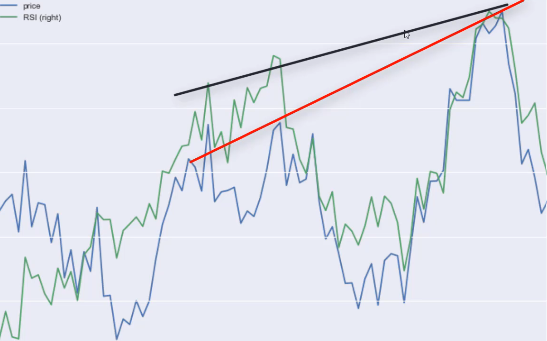

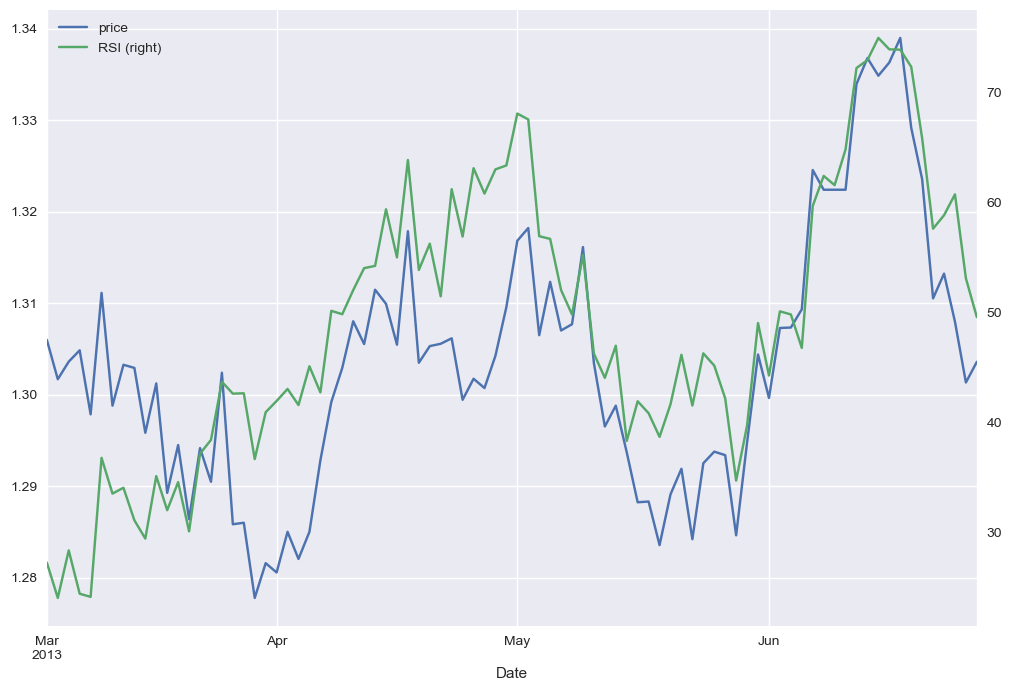

In [65]:
alt.loc["03-2013":"06-2013", ["price", "RSI"]].plot(figsize = (12, 8), secondary_y = "RSI")
plt.show()

Divergence: 
- if __Price__ reaches __higher highs__ -> __RSI fails__ to reach higher highs (__Bearish Divergence__)
- if __Price__ reaches __lower lows__ -> __RSI fails__ to reach lower lows (__Bullish Divergence__)

__Divergence__


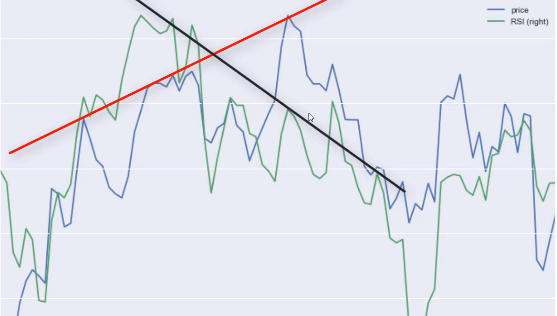

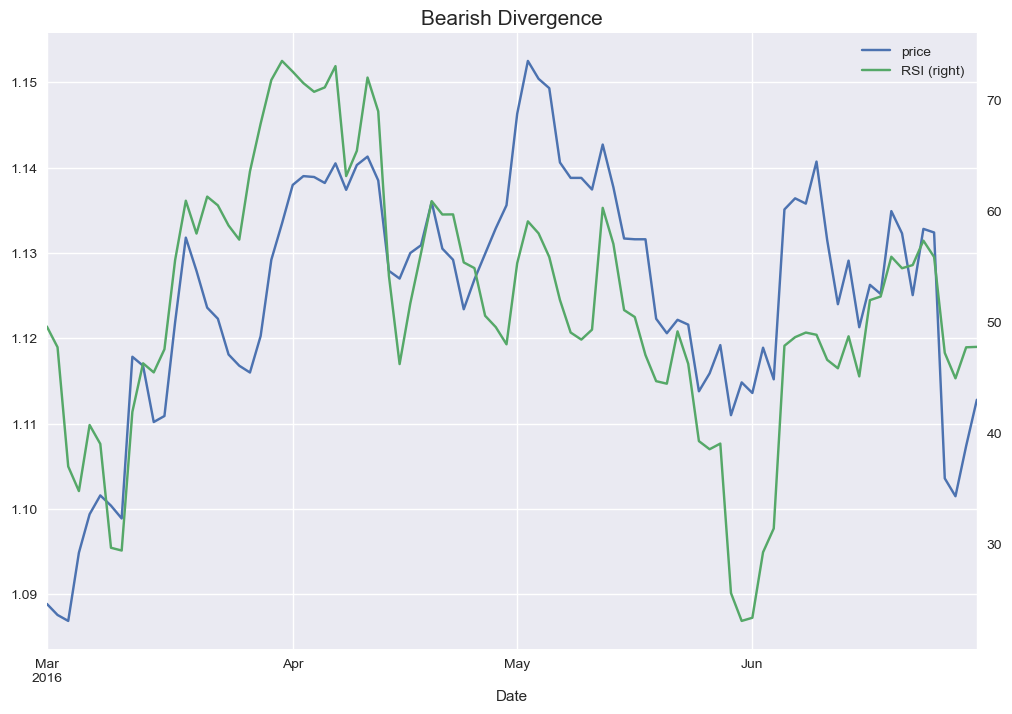

In [66]:
alt.loc["03-2016":"06-2016", ["price", "RSI"]].plot(figsize = (12, 8), secondary_y = "RSI")
plt.title("Bearish Divergence", fontsize = 15)
plt.show()

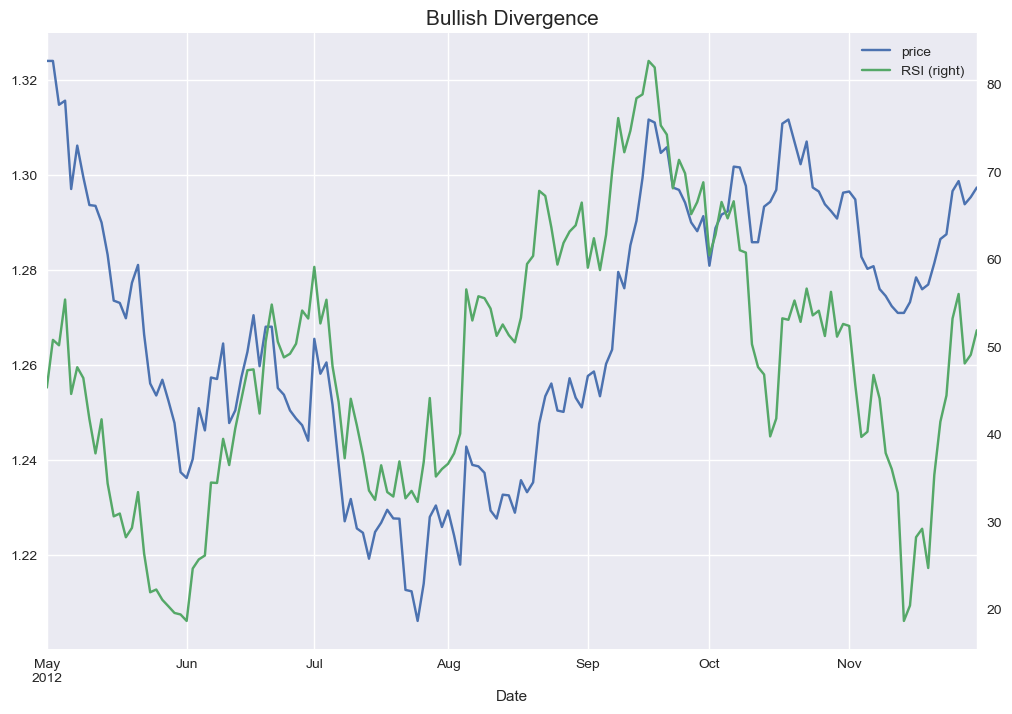

In [67]:
alt.loc["05-2012":"11-2012", ["price", "RSI"]].plot(figsize = (12, 8), secondary_y = "RSI")
plt.title("Bullish Divergence", fontsize = 15)
plt.show()

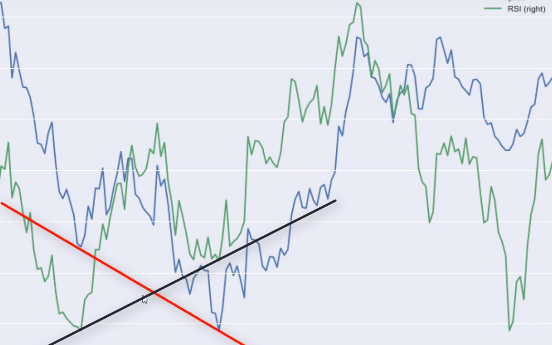